In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import math

sns.set()

%matplotlib inline
print("Imports loaded")

Imports loaded


In [2]:
sns.set()

In [3]:
df = pd.read_csv("Dataset.csv")

In [4]:
df.head()

,Timestamp,Submission,#,Added to
0,12/26/2020 15:43:10,anyone else ruin the magic of their favorite s...,30001.0,NaN
1,12/26/2020 16:09:16,Do we have to wear masks in our own common roo...,30002.0,NaN
2,12/26/2020 16:22:43,hey i'm a frosh and i was just wondering what ...,NaN,30002.0
3,12/26/2020 16:30:48,Does getting a PICS interview request mean any...,30003.0,NaN
4,12/26/2020 17:00:19,I wonder what it would look like to do 6 steps...,30004.0,NaN


In [5]:
df["Year"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).year)
df["Month"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).month)
df["Day"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).day)
df["Hour"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).hour)
df["Minute"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).minute)
df["Second"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).second)
df["WeekYear"] = df["Timestamp"].apply(lambda x: pd.to_datetime(x).isocalendar()[1])

In [6]:
df.drop("Timestamp", axis=1, inplace=True)

In [7]:
df["Added to"] = df["Added to"].apply(lambda x: int(x) if not math.isnan(x) else 0)
df["#"] = df["#"].apply(lambda x: int(x) if not math.isnan(x) else 0)
df["Is Question"] = df["Submission"].apply(lambda x: "?" in x)

In [8]:
df.head()

,Submission,#,Added to,Year,Month,Day,Hour,Minute,Second,WeekYear,Is Question
0,anyone else ruin the magic of their favorite s...,30001,0,2020,12,26,15,43,10,52,True
1,Do we have to wear masks in our own common roo...,30002,0,2020,12,26,16,9,16,52,True
2,hey i'm a frosh and i was just wondering what ...,0,30002,2020,12,26,16,22,43,52,True
3,Does getting a PICS interview request mean any...,30003,0,2020,12,26,16,30,48,52,True
4,I wonder what it would look like to do 6 steps...,30004,0,2020,12,26,17,0,19,52,False


In [9]:
df[["Year", "Month", "Day"]].apply(lambda x: x[1], axis=1)

0        12
1        12
2        12
3        12
4        12
         ..
11237     7
11238     7
11239     7
11240     7
11241     7
Length: 11242, dtype: int64

Text(0.5, 1.0, 'Submissions by Hours Since Midnight')

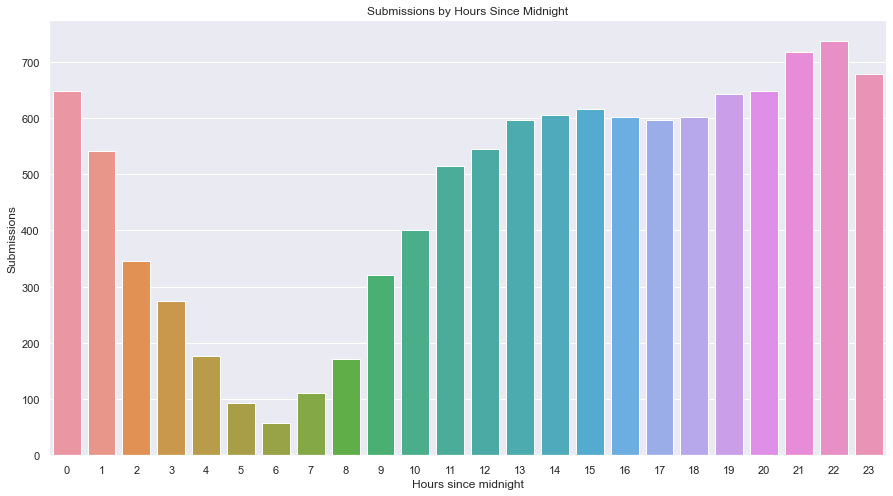

In [10]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x="Hour")
plt.xlabel("Hours since midnight")
plt.ylabel("Submissions")
plt.title("Submissions by Hours Since Midnight")

Text(0, 0.5, 'Submissions')

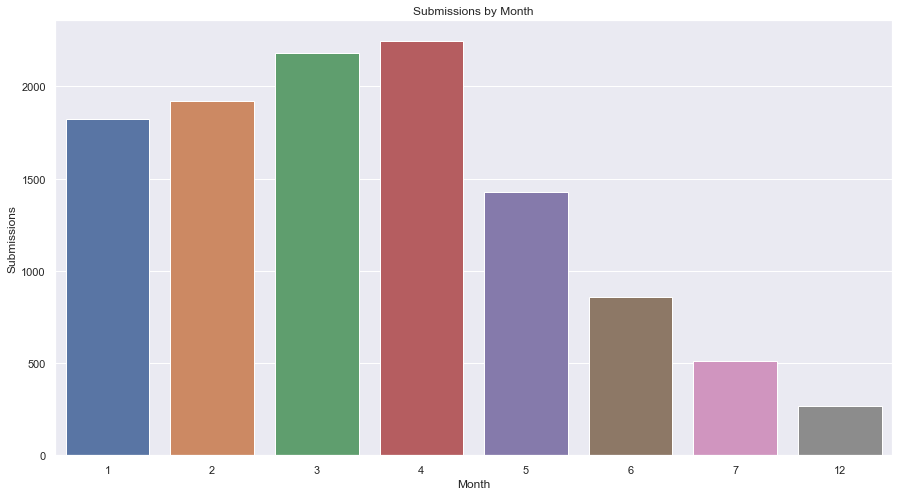

In [11]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x="Month")
plt.title("Submissions by Month")
plt.xlabel("Month")
plt.ylabel("Submissions")

Text(0, 0.5, 'Submissions')

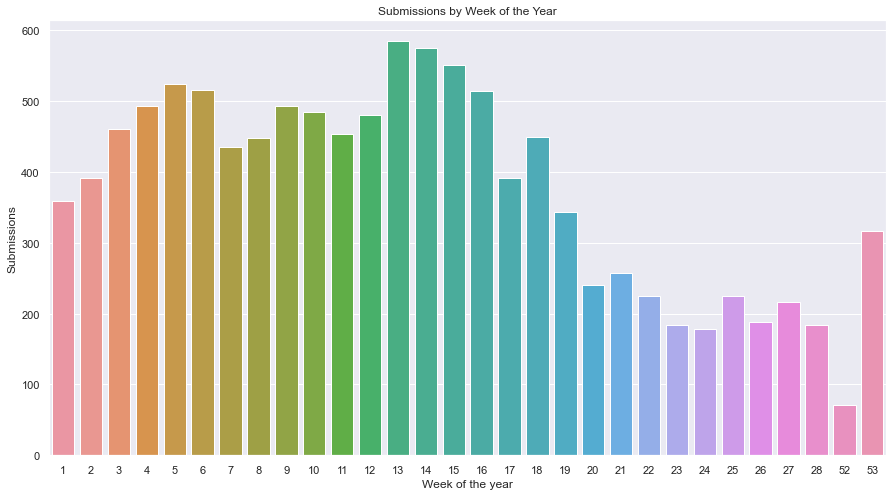

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x="WeekYear")
plt.title("Submissions by Week of the Year")
plt.xlabel("Week of the year")
plt.ylabel("Submissions")

Text(0, 0.5, 'Day of the month')

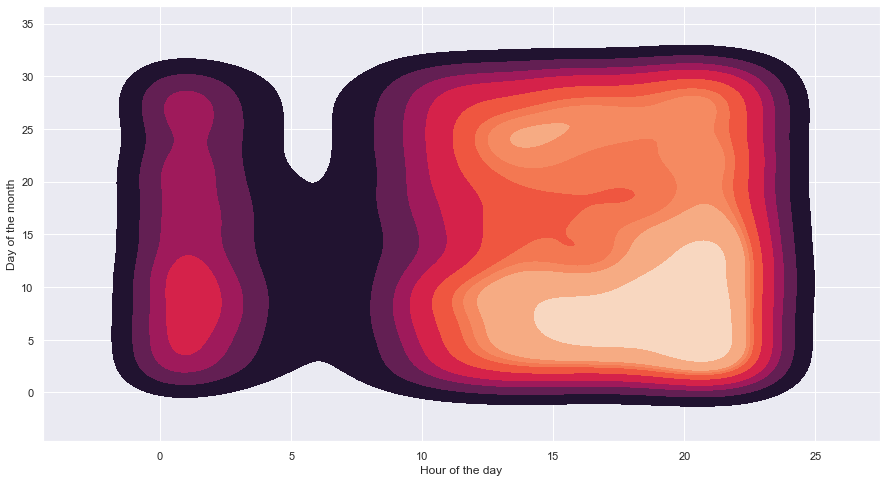

In [13]:
plt.figure(figsize=(15, 8))
sns.kdeplot(x=df["Hour"], y=df["Day"], cmap="rocket", fill=True)
plt.xlabel("Hour of the day")
plt.ylabel("Day of the month")

<AxesSubplot:xlabel='Is Question', ylabel='count'>

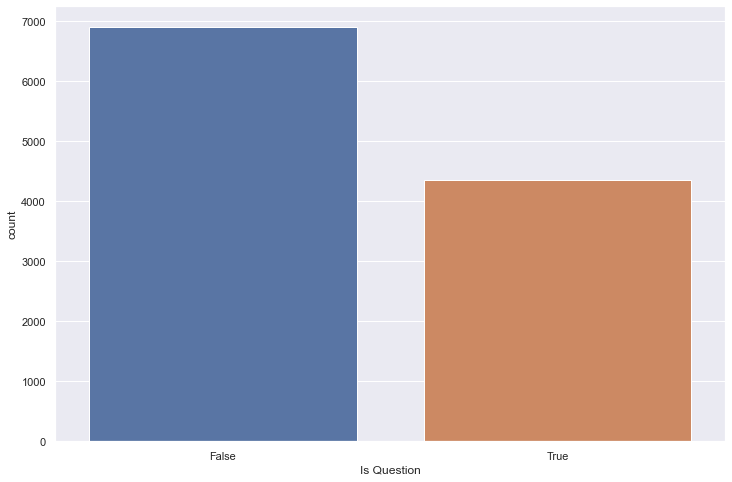

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Is Question")

In [15]:
df["Question Count"] = df["Submission"].apply(lambda x: x.count("?"))

<AxesSubplot:xlabel='Question Count', ylabel='count'>

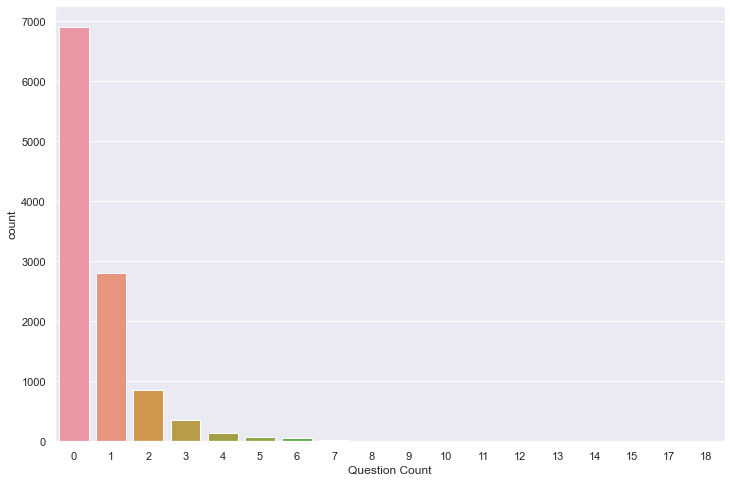

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x="Question Count")

The following section finds the 50 most popular words in submissions, organized by week. I had to rely on a bit of a hack to determine which words were "too" common, meaning that of the 30 weeks of submissions, these "too common" words appeard in more than 15 weeks. This was done in an attempt to better show the hottest topic of TC# at the time.

This was done by first getting a list of all non-stopwords (most common English words like "I", "you", etc), then finding which words appeared in more than 15 weeks of posts. This is certainly not elegant, as it uses repeated code, but I couldn't figure out a better method.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

common_words = []

for week in df["WeekYear"].unique():
    data_segment = df[df["WeekYear"] == week]["Submission"]

    corpus = [word.lower() for word in list(data_segment)]
    corpus = word_tokenize(" ".join(corpus))

    vectorizer = TfidfVectorizer(stop_words=stop_words)
    vectorizer.fit_transform(corpus)

    common_words.append(sorted(list(zip(vectorizer.get_feature_names(), vectorizer.idf_)), key=lambda e: e[1], reverse=False)[:50])

In [18]:
all_words = set([pair[0] for week in common_words for pair in week])
custom_stop_words = []

for word in all_words:
    count = 0
    for week in common_words:
        week_words = set()
        for pair in week:
            week_words.add(pair[0])
        if word in week_words:
            count+=1
    if count > 15:
        custom_stop_words.append(word)

In [19]:
stop_words = set(stopwords.words('english'))

for word in custom_stop_words:
    stop_words.add(word)

common_words = []

for week in df["WeekYear"].unique():
    data_segment = df[df["WeekYear"] == week]["Submission"]

    corpus = [word.lower() for word in list(data_segment)]
    corpus = word_tokenize(" ".join(corpus))

    vectorizer = TfidfVectorizer(stop_words=stop_words)
    vectorizer.fit_transform(corpus)

    common_words.append(sorted(list(zip(vectorizer.get_feature_names(), vectorizer.idf_)), key=lambda e: e[1], reverse=False)[:50])

In [20]:
weeks = df["WeekYear"].unique()

for idx, week in enumerate(common_words):
    print("WEEK", weeks[idx])
    for pair in week:
        print(pair[0])
    print("\n")

WEEK 52
take
eating
lot
thinking
semester
tell
form
getting
plural
room
things
best
different
fruit
singular
wondering
allowed
cant
club
dorm
interview
last
mean
offer
question
since
spring
stats
summer
taken
thing
trying
vs
always
boyfriend
ca
classes
clubs
course
cups
done
frosh
guess
jp
look
major
minute
na
open
pics


WEEK 53
semester
please
movie
getting
things
first
anything
ever
maybe
black
class
well
family
students
take
actually
say
friend
pretty
right
thought
able
living
next
nothing
parents
school
social
talk
two
always
crazy
especially
find
post
since
asian
bad
better
feeling
frosh
fucking
long
many
na
quarantine
racist
rich
sure
thing


WEEK 1
ever
semester
many
prestigious
school
actually
things
able
anything
say
first
work
na
take
always
nothing
thing
bad
days
home
parents
weird
better
gon
help
lot
might
new
seems
since
spring
thought
us
classes
degree
everyone
friend
getting
let
next
right
though
years
bc
bring
come
different
enough
everything
experience


WEEK 2
laundr

In [21]:
from wordcloud import WordCloud

plt.figure(figsize=(12,8))

for i in range(30):
    wc = WordCloud(max_words=50, background_color="white").generate(" ".join([pair[0] for pair in common_words[i]])).to_file("wordclouds/week%d.png" % df["WeekYear"].unique()[i])

<Figure size 864x576 with 0 Axes>